<a href="https://colab.research.google.com/github/Strix9289/Introduction-of-Deep-Learning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN
Convolution(畳み込み)層, Pooling層を混合させる


+ パラメタの削減
    二次元画像は、データ量が膨大にもかかわらず近くの画素同士の関連は強いのに対し、遠くの画素同士の関連は弱い。

    →畳み込み層で近くの画素同士の結合だけを考えてパラメタ数を減らす。

    また、パラメタを共有することで「どこ」にあるのかという情報を排除し、より画像としての特徴に本質的なものだけを残す。

+ 畳み込み層の意味
    そのフィルタに対する類似度のようなものの計算
    フィルタサイズを大きくすると広い範囲の特徴を、小さくすると局所的な特徴を獲得できる




Kerasにおいて畳み込み層を設定するには`keras.layers.Conv2D`を使用します。

主な引数は以下のとおりです。
- `filters`: フィルター (カーネル) の数
- `kernel_size`: フィルターの大きさ
- `strides`: フィルターを動かす幅

    入力の縦or横の次元数を$N$、フィルタの縦or横の次元数を$F$、フィルタを動かす幅を$S$とすると、出力のサイズは以下のように計算できます。

$$ (N-F)/S+1$$

- `padding`: パディング
- `activation`: 活性化関数
- `use_bias`: バイアス項の有無


In [1]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

#one-hotベクトル
#y_train = to_categorical(y_train,dtype='int32')
#y_test = to_categorical(y_test,dtype='int32')

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=10000)

y_train = np.eye(10)[y_train.astype('int32').flatten()]
ラベル番号が並ぶyをone-hotベクトルに変換する

y_train = to_categorical(y_train,dtype='int')
と同様

In [11]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

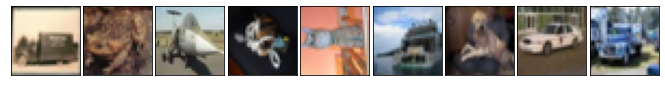

In [4]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

In [5]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model

In [6]:
model_CNN = Sequential()

model_CNN.add(Conv2D(6, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  # 32x32x3 -> 28x28x6

model_CNN.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6

model_CNN.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16

model_CNN.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model_CNN.add(Flatten())  # 5x5x16 -> 400

model_CNN.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120

model_CNN.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  # 120 ->84

model_CNN.add(Dense(10, activation='softmax'))  # 84 ->10

model_CNN.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

- monitor: 監視する変数
- patience: ループの最低数

過学習を防ぐためにval_loss」の減少が止まると自動的に学習のループから抜け出します。

In [19]:
%%time
early_stopping = EarlyStopping(patience=5, verbose=1)
history_CNN=model_CNN.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
            validation_data=(x_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
313/313 [==============================] - 28s 90ms/step - loss: 0.6131 - accuracy: 0.7844 - val_loss: 1.2378 - val_accuracy: 0.6137
Epoch 2/100
313/313 [==============================] - 28s 90ms/step - loss: 0.5843 - accuracy: 0.7952 - val_loss: 1.2818 - val_accuracy: 0.6112
Epoch 3/100
313/313 [==============================] - 28s 89ms/step - loss: 0.5716 - accuracy: 0.8000 - val_loss: 1.3044 - val_accuracy: 0.6137
Epoch 4/100
313/313 [==============================] - 28s 89ms/step - loss: 0.5578 - accuracy: 0.8043 - val_loss: 1.3490 - val_accuracy: 0.6062
Epoch 5/100
313/313 [==============================] - 30s 96ms/step - loss: 0.5458 - accuracy: 0.8063 - val_loss: 1.3701 - val_accuracy: 0.6093
Epoch 6/100
313/313 [==============================] - 28s 90ms/step - loss: 0.5244 - accuracy: 0.8157 - val_loss: 1.3704 - val_accuracy: 0.6094
Epoch 00006: early stopping
CPU times: user 4min 6s, sys: 4.15 s, total: 4min 10s
Wall time: 2min 51s


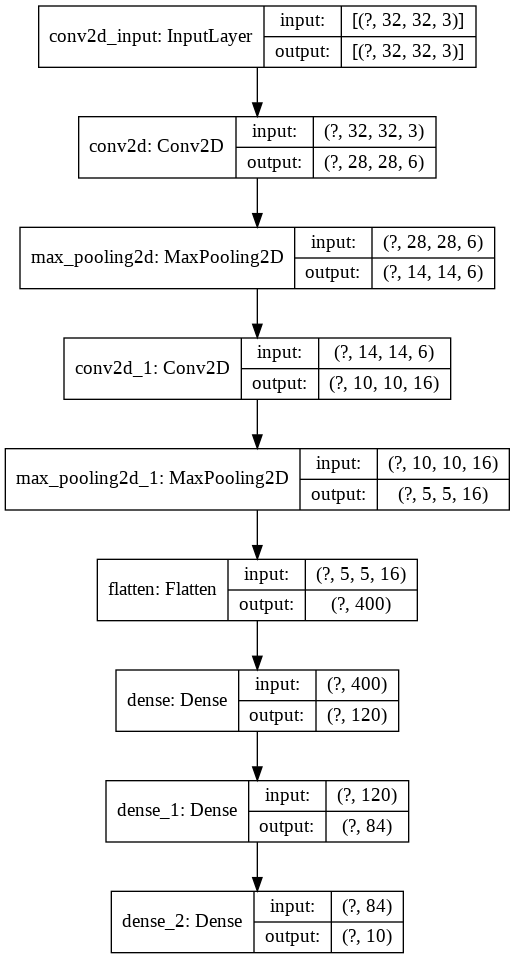

In [8]:
# モデル構造の可視化
from keras.utils import plot_model
plot_model(model_CNN, show_shapes=True)

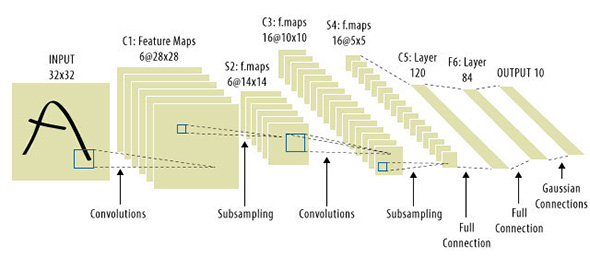

https://techfactory.itmedia.co.jp/tf/articles/1702/07/news035.html

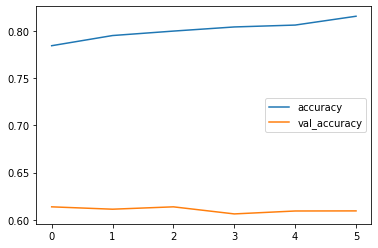

In [20]:
result_CNN = pd.DataFrame(history_CNN.history)
result_CNN[["accuracy", "val_accuracy"]].plot()

# Data Augmentation
poolingにより細かいずれがあっても特徴を獲得すrことができるが、大きなずれや回転、

反転などに対しては同じ特徴と認識することができない。

画像を疑似的に編集し、画像の量を増やす

## オリジナル画像

<a id='section_id'></a>

In [27]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

## 左右にずらす

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.4)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

## 上下にずらす

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.4)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

## 左右反転

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

## 回転

In [ ]:
datagen = ImageDataGenerator(rotation_range=30)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

## 実行コード

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,  #左右にずらす
    height_shift_range=0.2,  #上下にずらす
    horizontal_flip=True,  #左右反転
    # Global Contrast Normalization (GCN) 
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False)  #Zero-phase Component Analysis (ZCA) Whitening (Falseに設定しているのでここでは使用していない)

In [ ]:
history_AD=  model_CNN.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                       steps_per_epoch=x_train.shape[0] // 100, epochs=30, validation_data=(x_valid, y_valid))

In [ ]:
result_AD = pd.DataFrame(history_AD.history)
result_AD[["accuracy", "val_accuracy"]].plot()

その他にも色々あるので詳細は公式のドキュメントを参照してください。

Keras ImageDataGenerator: https://keras.io/preprocessing/image/

# 画像の正規化

## Global Contrast Normalization (GCN)


画像ごとにピクセルの値を平均0、分散1に正規化します。

$$x^{norm} = \frac{x - \mu}{\sqrt{\sigma}}$$

In [ ]:
# 可視化用に値のrangeを[0, 1]に修正
def normalize(x):
    #keepdims=Trueは入力と出力の次元を合わせる
    #axis=どの軸方向に要素を足し合わせていくか
    max_x = np.max(x, axis=(0, 1), keepdims=True)
    min_x = np.min(x, axis=(0, 1), keepdims=True)
    return (x - min_x) / (max_x - min_x)

## Zero-phase Component Analysis (ZCA) Whitening

入力の各要素間の相関をゼロ(白色化)にします。

PCAを利用して共分散行列を単位行列化 (分散1、共分散0) したのち、元の空間に戻します。


$$
    x^{ZCA} = A\Lambda^{-\frac{1}{2}}\Lambda^{T}(x - \mu)
$$


各ピクセル、各色成分について隣との差分を強調するフィルタ
目に隣接するピクセルは目の色の補色になっている。 

これが各ピクセル、各色成分について隣との差分を強調するフィルタの正体

https://sakataharumi.hatenablog.jp/entry/2016/10/18/20161018020000/

http://kikei.github.io/ai/2018/03/28/cifar10-whitening.html

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


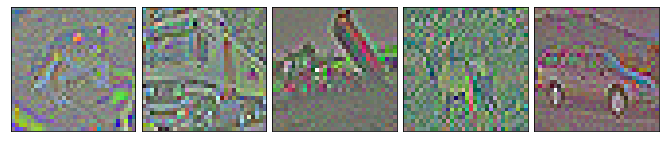

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zca_whitening = ImageDataGenerator(zca_whitening=True)

zca_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in zca_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    # Global Contrast Normalization (GCN) 
    samplewise_center=True,
    samplewise_std_normalization=True,
    zca_whitening=True)  #Zero-phase Component Analysis (ZCA) Whitening (Falseに設定しているのでここでは使用していない)

In [ ]:
history_N=  model_CNN.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                       steps_per_epoch=x_train.shape[0] // 100, epochs=30, validation_data=(x_valid, y_valid))

In [ ]:
result_N = pd.DataFrame(history_N.history)
result_N[["accuracy", "val_accuracy"]].plot()

# Batch Normalization

入力画像に対して正規化をおこなったように、各隠れ層の入力の分布も安定させたいと考えます。
これがない場合、深層のネットワークにおいては層を重ねるほど分布が不安定になります。
特に深層学習において、学習データと検証(評価)データ間で各層の分布が変わってしまう現象は **内部共変量シフト** と呼ばれます.

**Batch Normalization** では各層の出力を正規化することでこの問題の解決を試みます。

ある層への入力を$X\in\mathcal{R}^{H\times W\times C\times N}$(H:縦の次元数、W:横の次元数、C:チャンネル数、N:バッチサイズ)とすると、それぞれのチャンネルに対して平均・分散$\mu$、$\sigma^2\in\mathcal{R}^{H\times W\times C}$を計算し、正規化を行います。
$$
    \hat{X} = \frac{X - \mu}{\sigma}
$$
その後、平均・分散を調整する学習パラメータ$\gamma、\beta\in\mathcal{R}^{H\times W\times C}$を用いて出力を計算します。
$$
    Y = \gamma \hat{X} + \beta
$$

これにより、各層の出力の分布を安定させることができます。

**つまり、1層深くなるたびに正規化を行うことです。**


$\star$ 後続の研究で、Batch Normalizationは内部共変量シフトを軽減させる効果は実はほとんどないことが実験的に示されています。
一方でBatch Normalizationにより損失関数・勾配の形状が緩やかになり、勾配法などによる最適化が容易になることが実験的に・一部理論的に示されています。

```python
from keras.layers.normalization import BatchNormalization

...
model.add(BatchNormalization())
...


# Skip Connection

層を飛び越えた結合をつくることで勾配消失問題を解消しようとする手法です。

逆伝播の差異に入力層側に近いほど勾配の値が小さくなってしまいます。

そこで、層を重ねる際に処理をした後の値と処理をする前の値を足し合わせて次の層に値を送ることで100層を超えるNNを実装することもできます。

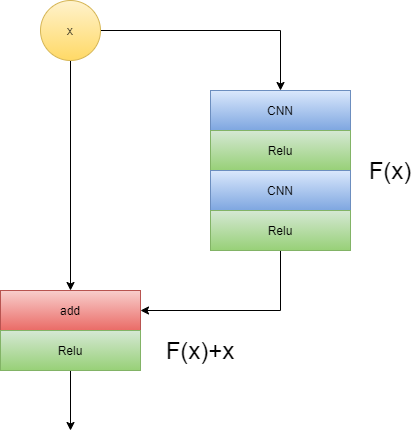

# Functional APIを使って作る

- Input関数で入力として受け付けるデータの次元を指定
- 加えたいレイヤー関数の入力それ以前のレイヤー情報を指定して、変数に入れていく
- Model関数で入力と出力を指定

In [22]:
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
def resblock(x, filters=64, kernel_size=(3, 3)):
    x_ = Conv2D(filters, kernel_size, padding='same')(x)
    x_ = BatchNormalization()(x_)
    x_ = Conv2D(filters, kernel_size, padding='same')(x_)
    x = Add()([x_, x])
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

#入力する次元を指定
inputs = Input(shape=(32, 32, 3))

#xという変数に層を入植層に近い順に追加していく
x = Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu')(inputs)
x = resblock(x)
x = resblock(x)
x = Flatten()(x)

#出力層の状態を指定する
y = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=y)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', metrics=['accuracy'])


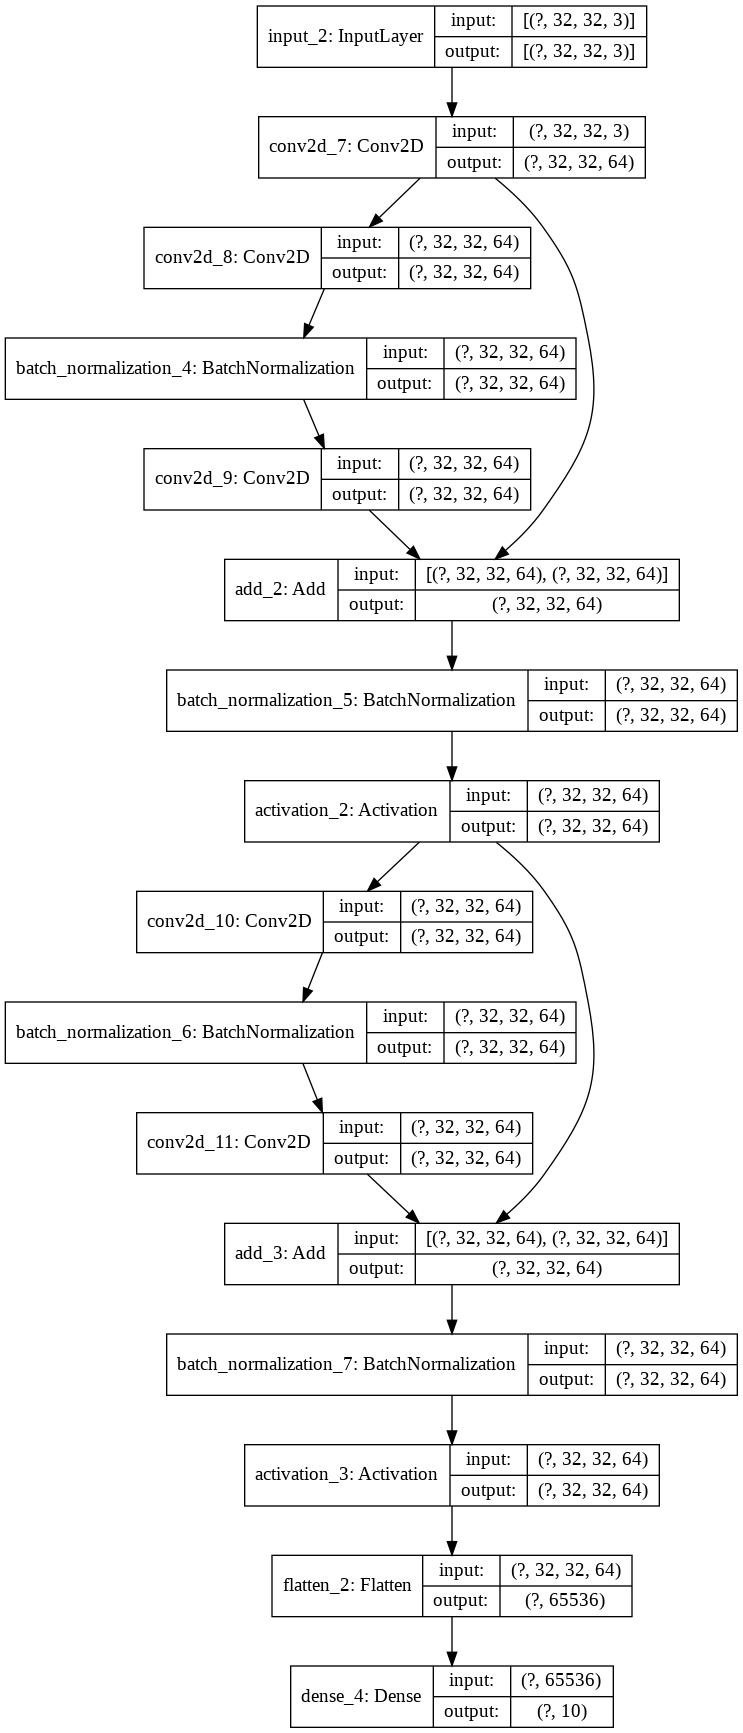

In [24]:
# モデル構造の可視化
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [26]:
%%time
history = model.fit(x_train, y_train, batch_size=128, epochs=3, verbose=1)

Epoch 1/3
313/313 [==============================] - 918s 3s/step - loss: 4.0368 - accuracy: 0.3571
Epoch 2/3
313/313 [==============================] - 919s 3s/step - loss: 1.2416 - accuracy: 0.5619
Epoch 3/3
313/313 [==============================] - 929s 3s/step - loss: 1.0079 - accuracy: 0.6494
CPU times: user 1h 29min 46s, sys: 38.5 s, total: 1h 30min 24s
Wall time: 46min 15s


In [32]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6877474784851074
Test accuracy: 0.46149998903274536


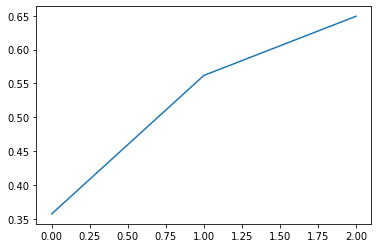

In [31]:
result = pd.DataFrame(history.history)
result["accuracy"].plot()

# 学習済みネットワークの利用

畳み込みニューラルネットワークの入力層付近では局所的な特徴 (エッジなど) を抽出しています。これらの特徴は多くの画像データに共通しています。

このことを利用し、あらかじめ別の大規模なデータセットで十分に学習されたネットワークの出力層以外の重みを初期値として活用することを考えます。

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
weights = [com.get_weights() for com in model.layers[1:]]



model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) # 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 30x30x64 -> 28x28x64
model.add(MaxPooling2D(pool_size=(2, 2))) # 28x28x64 -> 14x14x64

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 12x12x128 -> 10x10x128
model.add(MaxPooling2D(pool_size=(2, 2))) # 10x10x128 -> 5x5x128

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


上記のようにモデルを構築したのち、ロードした重みを各層に設定します。


# weightの初期化
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[3].set_weights(weights[3])
model.layers[4].set_weights(weights[4])


# 学習させたモデルの保存・再利用

学習させたモデルは`hdf5`形式で保存することができます。

```python
model.save('./mnist_cnn.h5')
```

#### 3.6.2 再利用

保存されたモデルは以下のようにロードして再利用することができます。

```python
from tensorflow.keras.models import load_model

model = load_model('./mnist_cnn.h5')

y_pred = model.predict(x_valid)
```